# Dynamical Power Systems Tutorial
## Part B: Coupled swing equations

Here, we consider a 6-machine power system model with a specific graph topology. This model is suited to investigate local- and inter-area oscillations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from source.coupled_swing_systems import GeneralModel
import networkx as nx
N = 6 
# Model parameters
M  = 0.02; D = 50; P = 5; K = 400.0

# Identical mass, damping parameters for each oscillator, also lines have the same coupling parameters
Ms = np.ones(N) * M; Ds = np.ones(N) * D; Ps = np.array([2.0, 1.0, 1.0, -1.0, -1.0, -2.0]) * P
# Define the coupling matrix
Kmatrix = np.array([[0.0, 1.0, 1.0, 0.0, 0.0, 0.0], 
                    [1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
                    [1.0, 1.0, 0.0, 1.0, 0.0, 0.0], 
                    [0.0, 0.0, 1.0, 0.0, 1.0, 1.0], 
                    [0.0, 1.0, 0.0, 1.0, 0.0, 1.0], 
                    [0.0, 0.0, 0.0, 1.0, 1.0, 0.0]]) * K


With the NetworkX package it is possible to visualise the power grid topology: 

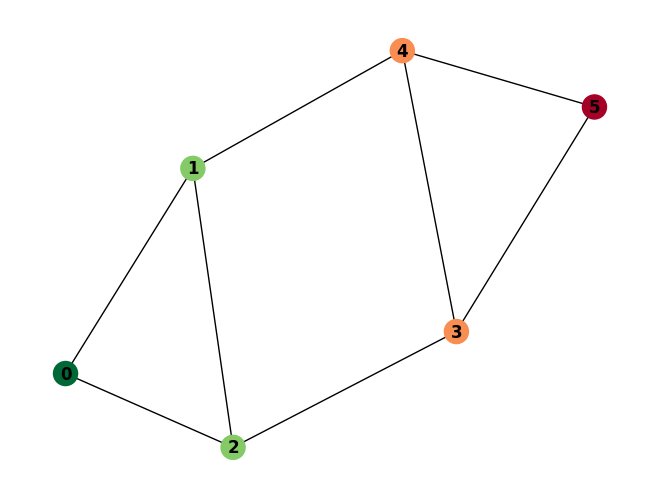

In [2]:
# Create graph instance from coupling matrix
graph = nx.Graph(Kmatrix)
# visualise the graph with colors according to P (green means production, red is consumption)
nx.draw(graph, with_labels=True, font_weight='bold', node_color=Ps, cmap=plt.cm.RdYlGn)

In [3]:
# Simulation parameters
t_span = (0.0, 4.0) # time span for the simulation
t_eval = np.linspace(t_span[0], t_span[1], 3000)


### Task 1 : Find the synchronous steady state 
Again, integrate the dynamical system and analyse the long-term behaviour for different model parameters.  

In [4]:
u_init = np.concatenate((np.zeros(N), np.zeros(N))) # initial conditions

# Model definition
model = GeneralModel(Ms, Ds, Ps, Kmatrix) 
# Integration
solution = solve_ivp(model, t_span, u_init, t_eval=t_eval);

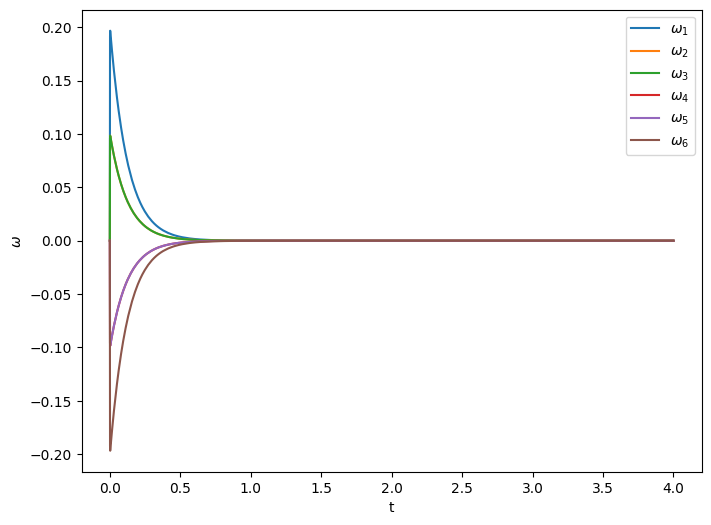

In [5]:
# Plot the frequencies
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(6, 12):
    ax.plot(solution.t, solution.y[i, :], label=r'$\omega_{{{:2d}}}$'.format(i-5))
ax.set_xlabel(r't')
ax.set_ylabel(r'$\omega$')
ax.legend()
plt.show()

In [6]:
# Save and print the final state (is it really steady state?)
u_eq = solution.y[:, -1]
print("phi_eq = ", u_eq[:6], "\n", "omega_eq = ", u_eq[6:])

phi_eq =  [ 0.02500163  0.0125013   0.0125013  -0.0125013  -0.0125013  -0.02500163] 
 omega_eq =  [-6.07882011e-07 -3.03988514e-07 -3.03988514e-07  3.03988514e-07
  3.03988514e-07  6.07882011e-07]


### Task 2: Perturb the system

Here, we consider the impact of load jumps and line drops on system dynamics. For each event, append a corresponding dictionary object to the events array. But first increase considered time frame and decrease line coupling. 

In [7]:
# Simulation parameters
t_span = (0.0, 20.0) # time span for the simulation
t_eval = np.linspace(t_span[0], t_span[1], 2000)
K = 50

In [8]:
# Events array 
events = []
events.append({'time': 5.0, 'load_jump': np.array([-4.0*P, 0.0, 0.0, 0.0, 0.0, 0.0]) * P}) # Example of a load jump at t=5.0
events.append({'time': 10.0, 'line_drop': (2,3)}) # Example of a line drop at t=10.0

# Reset system Ps and Kmatrix
Ps = np.array([2.0, 1.0, 1.0, -1.0, -1.0, -2.0]) * P
Kmatrix = np.array([[0.0, 1.0, 1.0, 0.0, 0.0, 0.0], 
                    [1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
                    [1.0, 1.0, 0.0, 1.0, 0.0, 0.0], 
                    [0.0, 0.0, 1.0, 0.0, 1.0, 1.0], 
                    [0.0, 1.0, 0.0, 1.0, 0.0, 1.0], 
                    [0.0, 0.0, 0.0, 1.0, 1.0, 0.0]]) * K

# Model definition
model = GeneralModel(Ms, Ds, Ps, Kmatrix, events=events) 
# Integration
solution = solve_ivp(model, t_span, u_eq, t_eval=t_eval)


Load jump event at time 5.00001515837181:
Line drop event at time 10.000235484809453:


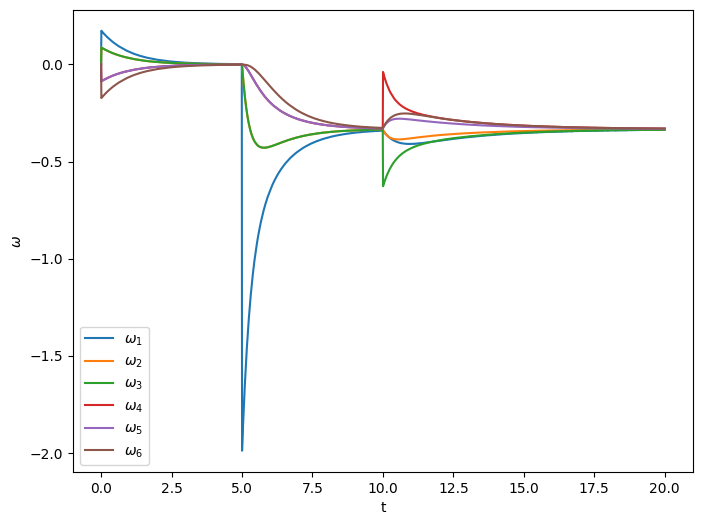

In [9]:
# Plot the frequencies
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for i in range(6, 12):
    ax.plot(solution.t, solution.y[i, :], label=r'$\omega_{{{:2d}}}$'.format(i -5))
ax.set_xlabel(r't')
ax.set_ylabel(r'$\omega$')
ax.legend()
plt.show()